# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
on the coefficient of a linear model.

In this exercise, we will study the advantage of using some regularization
when dealing with correlated features.

We will first create a regression dataset. This dataset will contain 2,000
samples and 5 features from which only 2 features will be informative.

In [1]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000,
    n_features=5,
    n_informative=2,
    shuffle=False,
    coef=True,
    random_state=0,
    noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Relevant feature #0     9.566665
Relevant feature #1    40.192077
Noisy feature #0        0.000000
Noisy feature #1        0.000000
Noisy feature #2        0.000000
dtype: float64

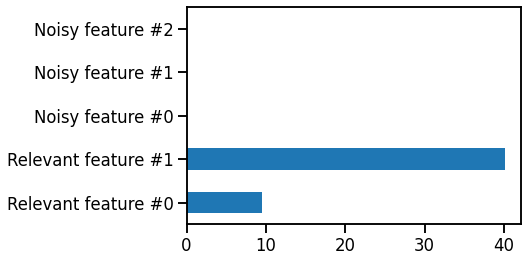

In [2]:
import pandas as pd

feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [3]:
# Write your code here.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data, target)
print(model.coef_)


[10.89587004 40.41128042 -0.20542454 -0.18954462  0.11129768]


<AxesSubplot:>

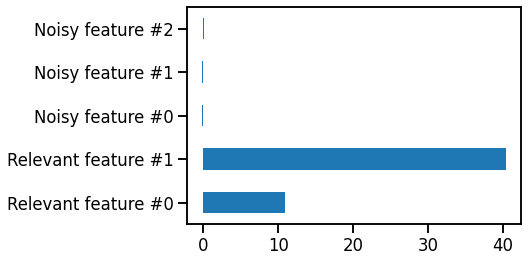

In [4]:
feature_names = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
]
coef = pd.Series(model.coef_, index=feature_names)
coef.plot.barh()

Now, create a new dataset that will be the same as `data` with 4 additional
columns that will repeat twice features 0 and 1. This procedure will create
perfectly correlated features.

In [5]:
# Write your code here.
# solution
import numpy as np

data = np.concatenate([data, data[:, [0, 1]], data[:, [0, 1]]], axis=1)

Fit again the linear regressor on this new dataset and check the
coefficients. What do you observe?

In [9]:
# Write your code here.
model2 = LinearRegression()
model2.fit(data, target)
model2.coef_

array([ 1.81143870e+15, -2.10014256e+13, -2.19253372e-01, -2.51228987e-01,
        5.65998472e-02, -9.05719348e+14, -2.88975896e+13, -9.05719347e+14,
        4.98990152e+13])

<AxesSubplot:>

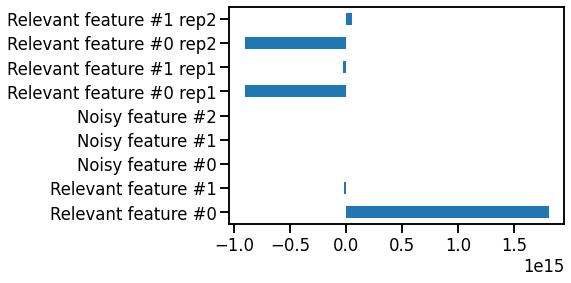

In [10]:
# Write your code here.
feature_names2 = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
    "Relevant feature #0 rep1",
    "Relevant feature #1 rep1",
    "Relevant feature #0 rep2",
    "Relevant feature #1 rep2",
]
coef = pd.Series(model2.coef_, index=feature_names2)
coef.plot.barh()

Create a ridge regressor and fit on the same dataset. Check the coefficients.
What do you observe?

In [11]:
# Write your code here.
from sklearn.linear_model import Ridge
modelRidge = Ridge()
modelRidge.fit(data, target)
modelRidge.coef_


array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 , 13.46802113,  3.6313933 , 13.46802113])

<AxesSubplot:>

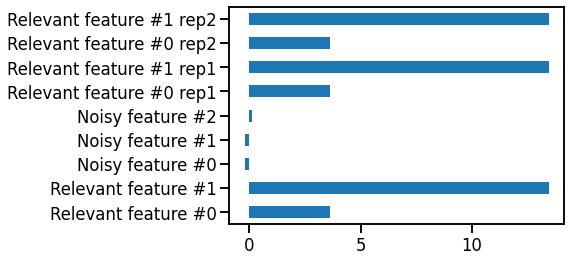

In [12]:
feature_names_ridge = [
    "Relevant feature #0",
    "Relevant feature #1",
    "Noisy feature #0",
    "Noisy feature #1",
    "Noisy feature #2",
    "Relevant feature #0 rep1",
    "Relevant feature #1 rep1",
    "Relevant feature #0 rep2",
    "Relevant feature #1 rep2",
]
coef = pd.Series(modelRidge.coef_, index=feature_names_ridge)
coef.plot.barh()

Can you find the relationship between the ridge coefficients and the original
coefficients?

In [13]:
# Write your code here. Repeating three times each informative features induced to divide the ridge coefficients by three.
# solution
modelRidge.coef_[:5] * 3

array([10.89417991, 40.40406338, -0.61648035, -0.56789883,  0.33351616])